In [1]:
# Credit Risk Assessment: Data Exploration
# Notebook 01: Exploratory Data Analysis (EDA)

"""
OBJECTIVES:
1. Load and understand the German Credit dataset
2. Analyze feature distributions and relationships
3. Identify data quality issues
4. Understand class imbalance
5. Generate insights for feature engineering
"""

# ============================================================================
# IMPORTS
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ All packages imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")






✓ All packages imported successfully!
Pandas version: 2.0.3
NumPy version: 1.24.3


In [2]:
# ============================================================================
# 1. LOAD DATA
# ============================================================================
print("\n" + "="*80)
print("SECTION 1: DATA LOADING")
print("="*80)

# Load the dataset
data_path = '../data/raw/german_credit_data.csv'

df = pd.read_csv(data_path)
print(f"✓ Data loaded successfully!")
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
df.head()


SECTION 1: DATA LOADING
✓ Data loaded successfully!
Dataset shape: 1000 rows × 21 columns

First 5 rows of the dataset:


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
# ============================================================================
# 2. BASIC DATA UNDERSTANDING
# ============================================================================
print("\n" + "="*80)
print("SECTION 2: BASIC DATA INFORMATION")
print("="*80)

# Data types and non-null counts
print("\nData Types and Missing Values:")
print(df.info())

print("\n" + "-"*80)

# Statistical summary
print("\nStatistical Summary (Numerical Features):")
df.describe()


SECTION 2: BASIC DATA INFORMATION

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   ob

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [4]:
# Check for missing values
print("\nMissing Values Count:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values found!")
else:
    print(missing[missing > 0])

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Check column names
print(f"\nColumn names ({len(df.columns)} total):")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")


Missing Values Count:
✓ No missing values found!

Duplicate rows: 0

Column names (21 total):
1. checking_status
2. duration
3. credit_history
4. purpose
5. credit_amount
6. savings_status
7. employment
8. installment_commitment
9. personal_status
10. other_parties
11. residence_since
12. property_magnitude
13. age
14. other_payment_plans
15. housing
16. existing_credits
17. job
18. num_dependents
19. own_telephone
20. foreign_worker
21. class


In [5]:
# ============================================================================
# 3. TARGET VARIABLE ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("SECTION 3: TARGET VARIABLE ANALYSIS")
print("="*80)

# The 'class' column is our target (1=Good, 2=Bad)
# Let's convert it to 0=Good, 1=Bad for easier interpretation
df['target'] = (df['class'] == 2).astype(int)

print("Original 'class' distribution:")
print(df['class'].value_counts().sort_index())

print("\nConverted 'target' distribution:")
print(df['target'].value_counts().sort_index())
print("\nTarget percentages:")
print(df['target'].value_counts(normalize=True) * 100)

# Calculate imbalance ratio
good_count = (df['target'] == 0).sum()
bad_count = (df['target'] == 1).sum()
imbalance_ratio = good_count / bad_count

print(f"\n⚠️ Class Imbalance Ratio: {imbalance_ratio:.2f}:1 (Good:Bad)")
print(f"This means there are {imbalance_ratio:.1f}x more good credits than bad credits")


SECTION 3: TARGET VARIABLE ANALYSIS
Original 'class' distribution:
class
1    700
2    300
Name: count, dtype: int64

Converted 'target' distribution:
target
0    700
1    300
Name: count, dtype: int64

Target percentages:
target
0    70.0
1    30.0
Name: proportion, dtype: float64

⚠️ Class Imbalance Ratio: 2.33:1 (Good:Bad)
This means there are 2.3x more good credits than bad credits


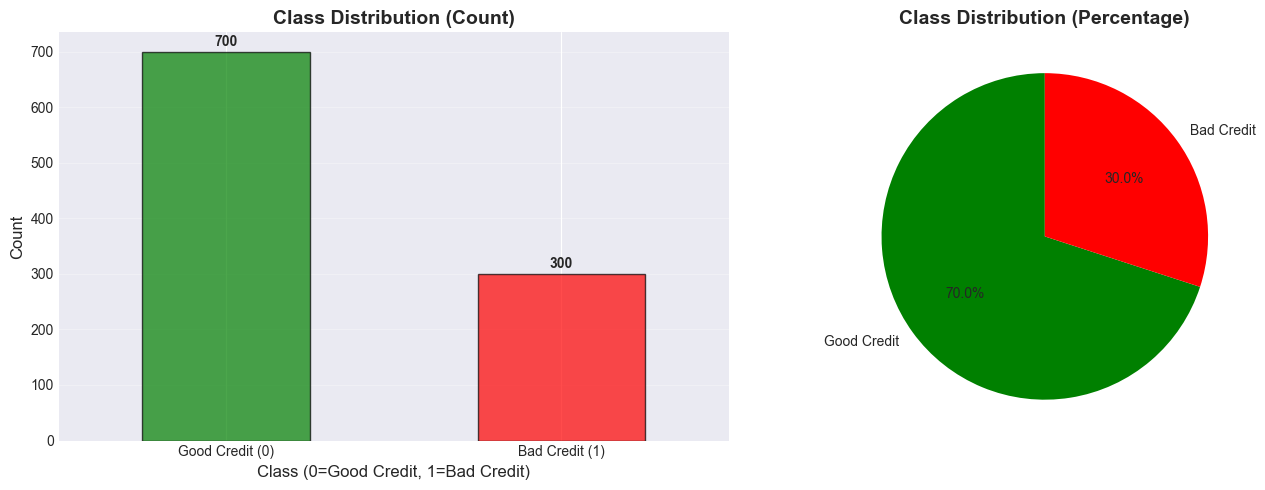


✓ Visualization created!


In [6]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
df['target'].value_counts().sort_index().plot(kind='bar', ax=axes[0], 
                                               color=['green', 'red'], 
                                               edgecolor='black', alpha=0.7)
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0=Good Credit, 1=Bad Credit)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Good Credit (0)', 'Bad Credit (1)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(df['target'].value_counts().sort_index()):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Pie chart
df['target'].value_counts().sort_index().plot(kind='pie', ax=axes[1], 
                                               autopct='%1.1f%%',
                                               colors=['green', 'red'], 
                                               labels=['Good Credit', 'Bad Credit'],
                                               startangle=90)
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print("\n✓ Visualization created!")

In [7]:
# Quick check of class imbalance
print("="*60)
print("CLASS IMBALANCE SUMMARY")
print("="*60)

good_count = (df['target'] == 0).sum()
bad_count = (df['target'] == 1).sum()
total = len(df)

print(f"\nGood Credit (0): {good_count} ({good_count/total*100:.1f}%)")
print(f"Bad Credit (1):  {bad_count} ({bad_count/total*100:.1f}%)")
print(f"Total samples:   {total}")

imbalance_ratio = good_count / bad_count
print(f"\n⚠️ Imbalance Ratio: {imbalance_ratio:.2f}:1")
print(f"   → There are {imbalance_ratio:.1f} good credits for every 1 bad credit")

print("\n💡 What this means:")
print("   - Dataset is IMBALANCED")
print("   - We'll need to handle this in (modeling)")
print("   - Techniques: SMOTE, class weights, or undersampling")
print("="*60)

CLASS IMBALANCE SUMMARY

Good Credit (0): 700 (70.0%)
Bad Credit (1):  300 (30.0%)
Total samples:   1000

⚠️ Imbalance Ratio: 2.33:1
   → There are 2.3 good credits for every 1 bad credit

💡 What this means:
   - Dataset is IMBALANCED
   - We'll need to handle this in (modeling)
   - Techniques: SMOTE, class weights, or undersampling



SECTION 5: NUMERICAL FEATURES ANALYSIS
Found 7 numerical features:
  1. duration
  2. credit_amount
  3. installment_commitment
  4. residence_since
  5. age
  6. existing_credits
  7. num_dependents


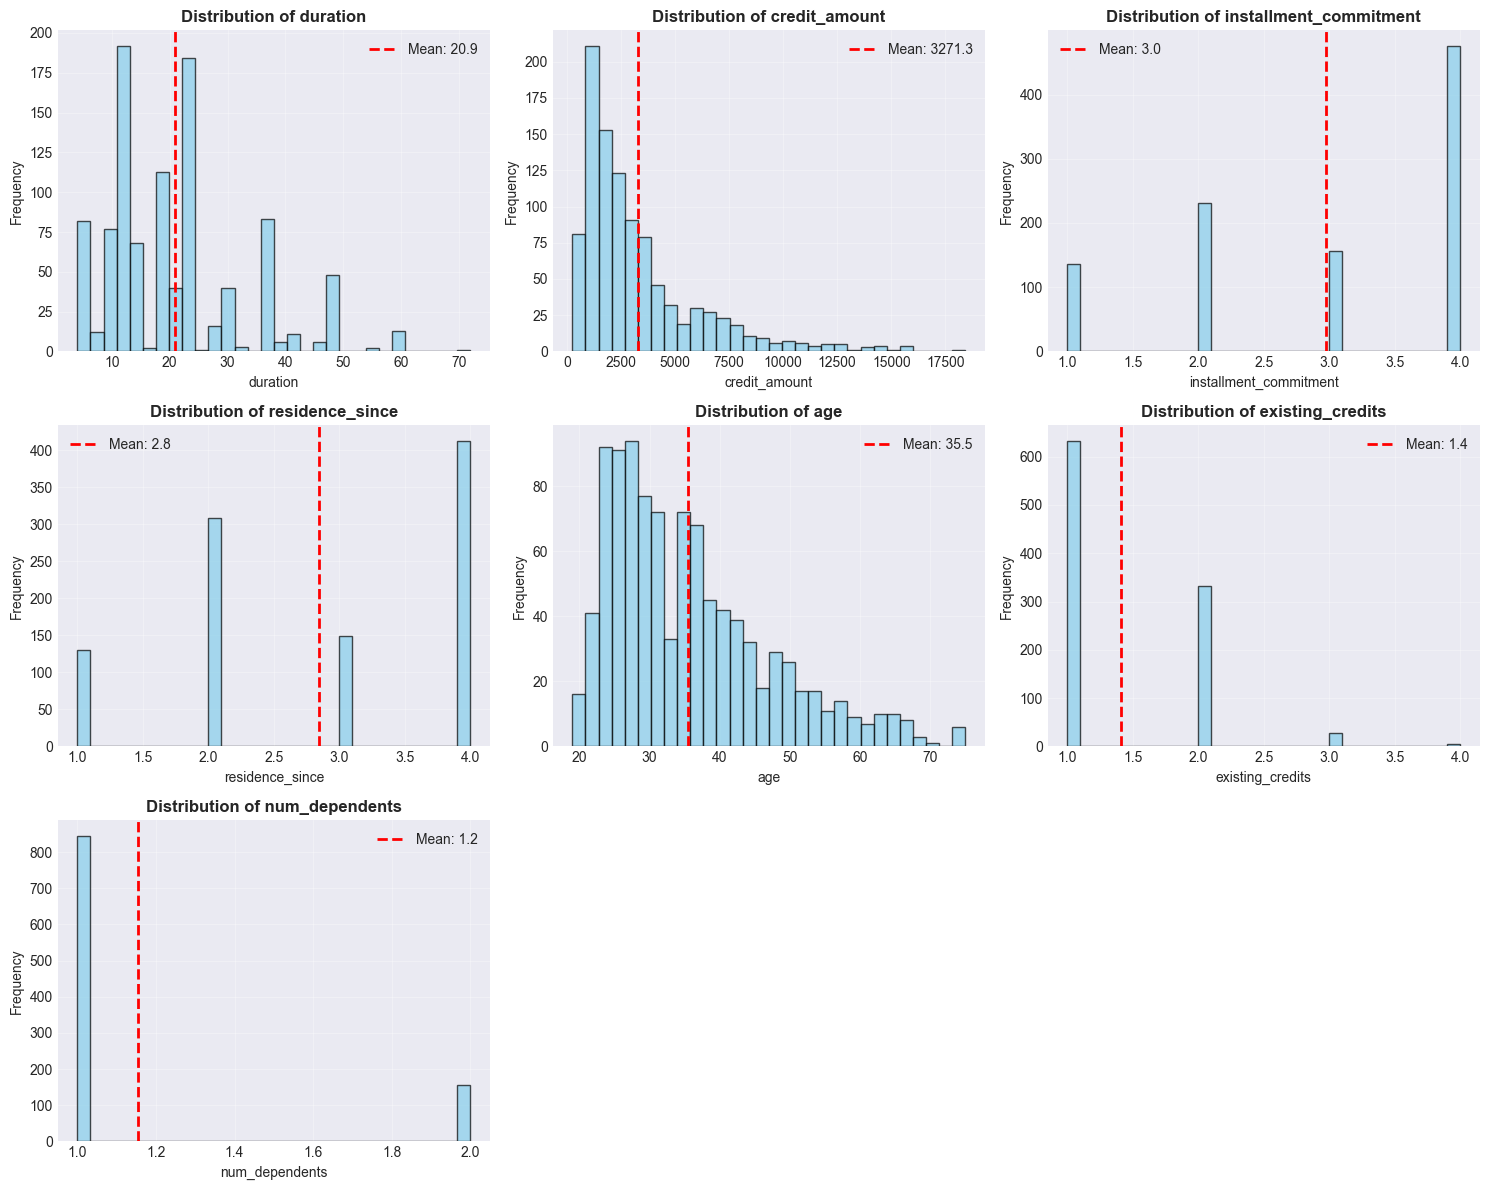


✓ Created distribution plots for 7 numerical features


In [10]:
# ============================================================================
# 5. NUMERICAL FEATURES DISTRIBUTION
# ============================================================================
print("\n" + "="*80)
print("SECTION 5: NUMERICAL FEATURES ANALYSIS")
print("="*80)

# Define numerical and categorical features here
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target and class from the list
for col in ['target', 'class']:
    if col in numerical_features:
        numerical_features.remove(col)

print(f"Found {len(numerical_features)} numerical features:")
for i, feat in enumerate(numerical_features, 1):
    print(f"  {i}. {feat}")

# Plot distributions of numerical features
if len(numerical_features) > 0:
    n_features = len(numerical_features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, feature in enumerate(numerical_features):
        ax = axes[idx]
        
        # Histogram
        df[feature].hist(bins=30, ax=ax, alpha=0.7, edgecolor='black', color='skyblue')
        
        ax.set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)
        ax.grid(True, alpha=0.3)
        
        # Add mean line
        mean_val = df[feature].mean()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
        ax.legend()
    
    # Hide extra subplots
    for idx in range(len(numerical_features), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n✓ Created distribution plots for {len(numerical_features)} numerical features")
else:
    print("\n⚠️ No numerical features found")


SECTION 6: CATEGORICAL FEATURES ANALYSIS
Found 13 categorical features

Unique values in each categorical feature:

checking_status: 4 unique values
  Values: ['A11', 'A12', 'A13', 'A14']

credit_history: 5 unique values
  Values: ['A30', 'A31', 'A32', 'A33', 'A34']

purpose: 10 unique values
  Values: ['A40', 'A41', 'A410', 'A42', 'A43', 'A44', 'A45', 'A46', 'A48', 'A49']

savings_status: 5 unique values
  Values: ['A61', 'A62', 'A63', 'A64', 'A65']

employment: 5 unique values
  Values: ['A71', 'A72', 'A73', 'A74', 'A75']

personal_status: 4 unique values
  Values: ['A91', 'A92', 'A93', 'A94']

other_parties: 3 unique values
  Values: ['A101', 'A102', 'A103']

property_magnitude: 4 unique values
  Values: ['A121', 'A122', 'A123', 'A124']

other_payment_plans: 3 unique values
  Values: ['A141', 'A142', 'A143']

housing: 3 unique values
  Values: ['A151', 'A152', 'A153']

job: 4 unique values
  Values: ['A171', 'A172', 'A173', 'A174']

own_telephone: 2 unique values
  Values: ['A191',

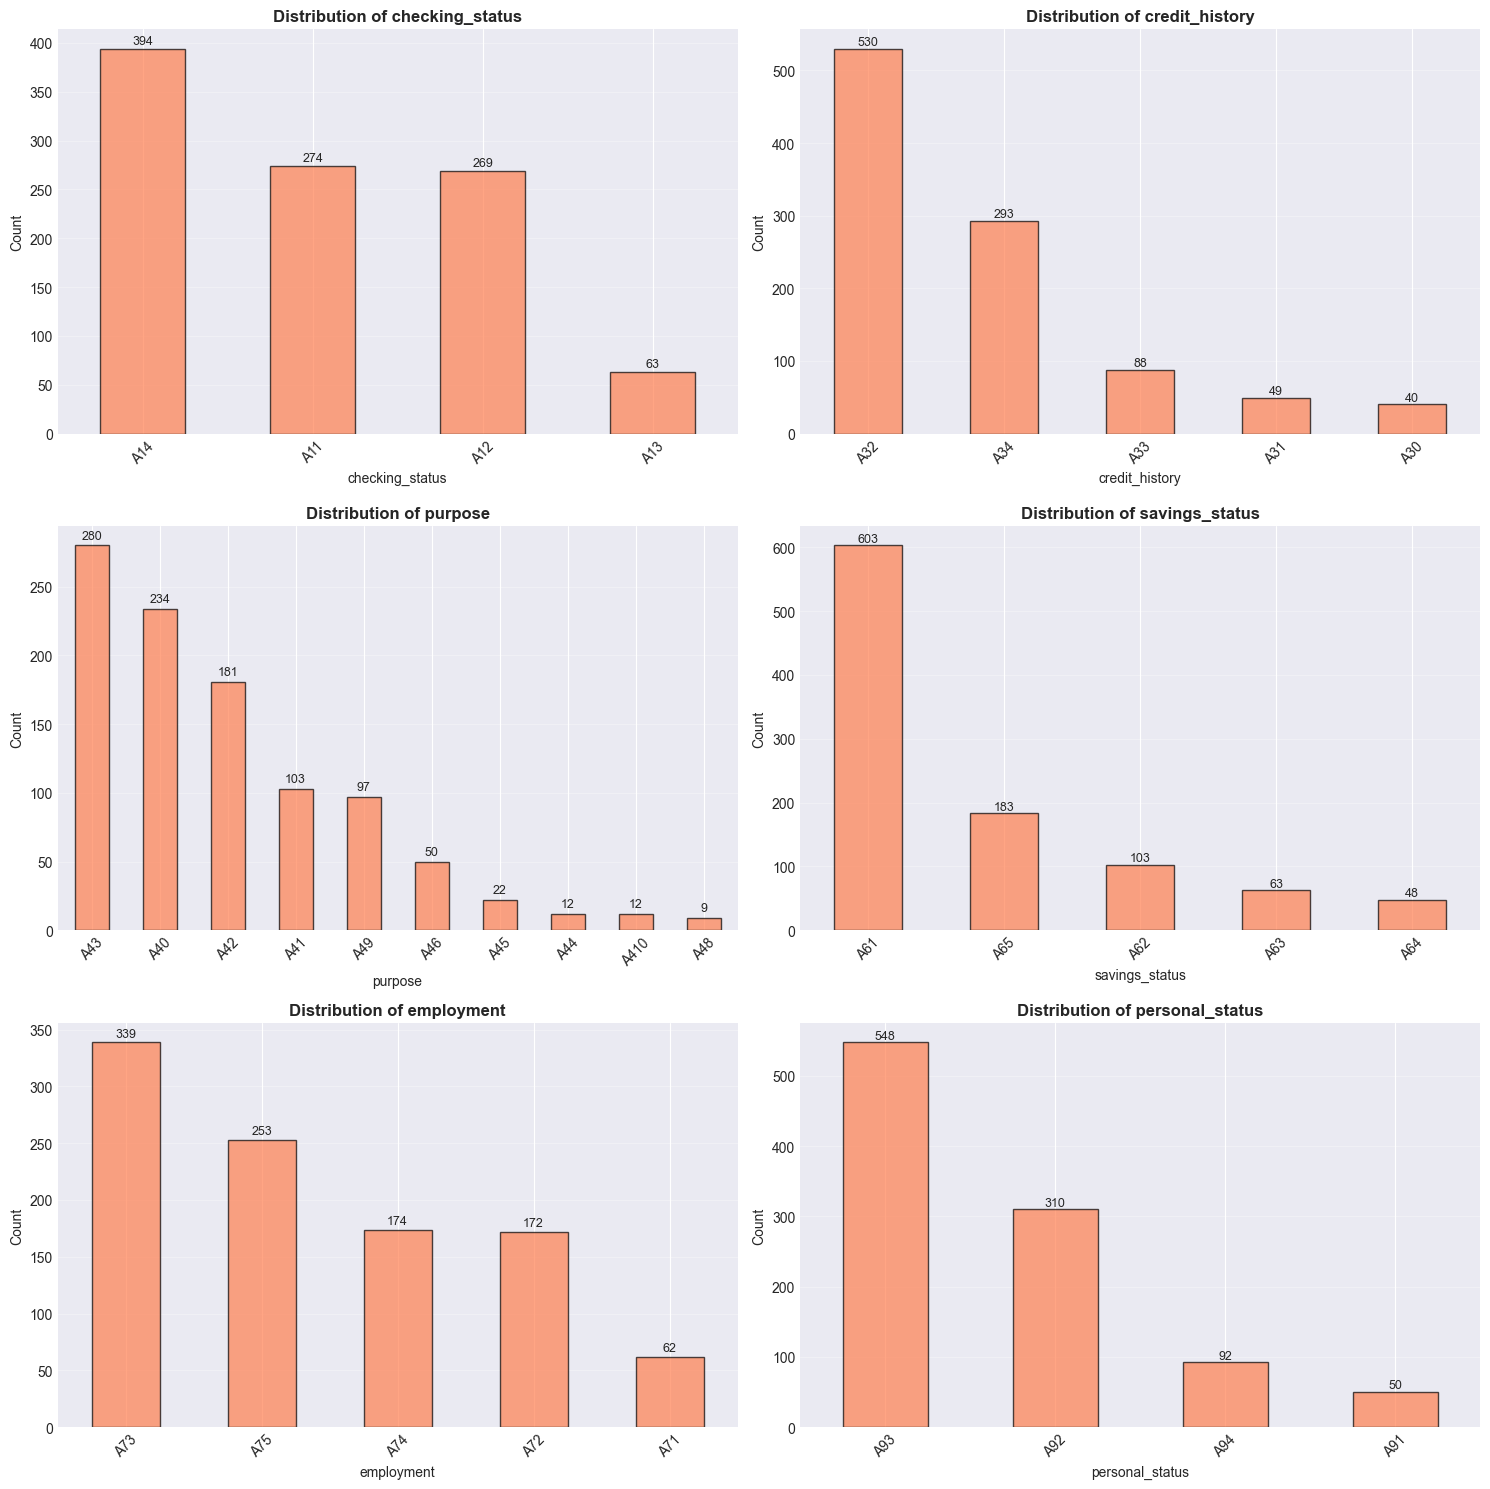


✓ Created bar plots for categorical features


In [11]:
# ============================================================================
# 6. CATEGORICAL FEATURES ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("SECTION 6: CATEGORICAL FEATURES ANALYSIS")
print("="*80)

# Define categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove target and class if they're there
for col in ['target', 'class']:
    if col in categorical_features:
        categorical_features.remove(col)

print(f"Found {len(categorical_features)} categorical features")

if len(categorical_features) > 0:
    print("\nUnique values in each categorical feature:")
    for feature in categorical_features:
        n_unique = df[feature].nunique()
        print(f"\n{feature}: {n_unique} unique values")
        if n_unique <= 10:
            print(f"  Values: {sorted(df[feature].unique().tolist())}")
    
    # Visualize first 6 categorical features
    n_features = min(len(categorical_features), 6)
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, feature in enumerate(categorical_features[:n_features]):
        ax = axes[idx]
        
        value_counts = df[feature].value_counts()
        value_counts.plot(kind='bar', ax=ax, color='coral', edgecolor='black', alpha=0.7)
        
        ax.set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add count labels
        for i, v in enumerate(value_counts):
            ax.text(i, v + 5, str(v), ha='center', fontsize=9)
    
    # Hide extra subplots
    for idx in range(n_features, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n✓ Created bar plots for categorical features")
else:
    print("\n✓ No categorical features found (all features are numerical/encoded)")


SECTION 7: CORRELATION ANALYSIS


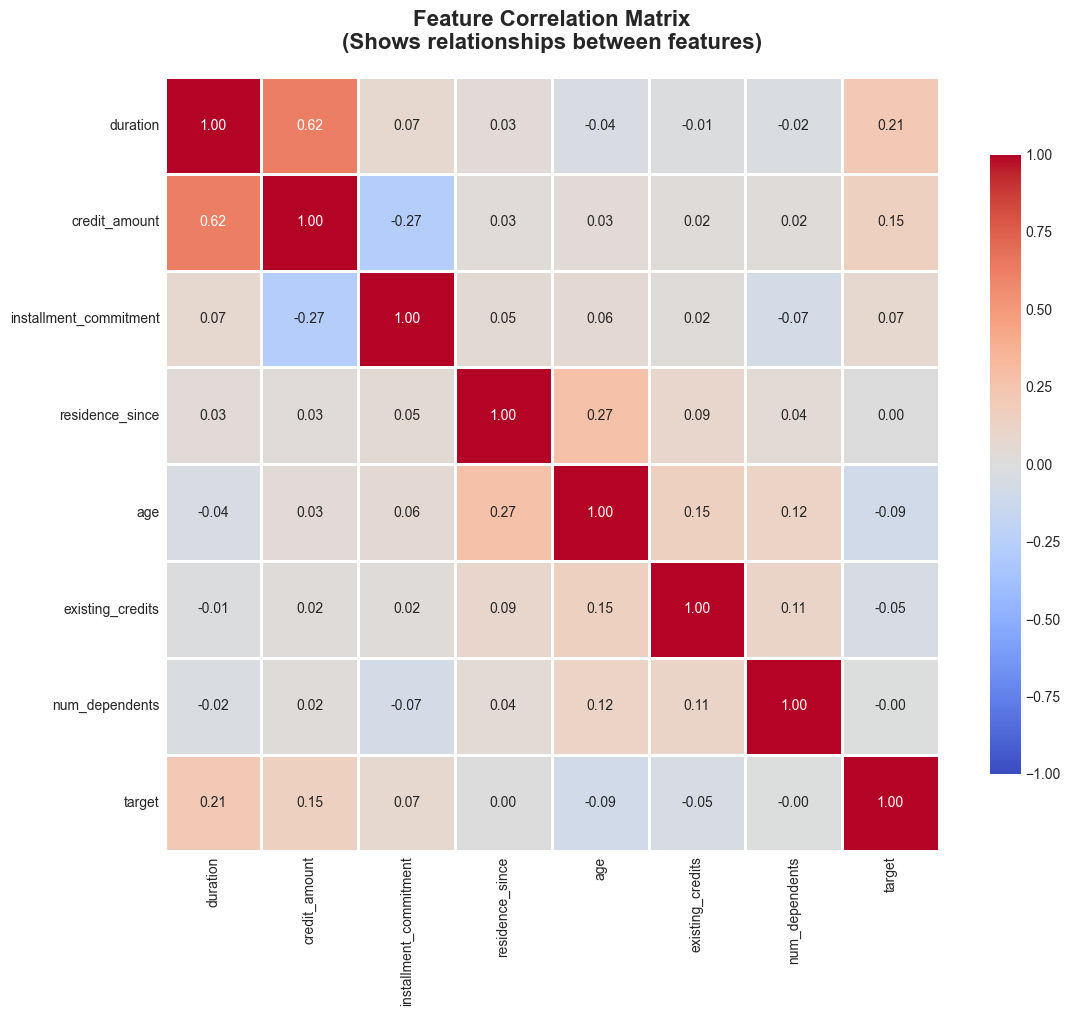


TOP FEATURES CORRELATED WITH TARGET

Strongest correlations (absolute value):
duration                  0.214927
credit_amount             0.154739
age                      -0.091127
installment_commitment    0.072404
existing_credits         -0.045732
num_dependents           -0.003015
residence_since           0.002967
Name: target, dtype: float64

💡 Interpretation:
   • Positive correlation = higher value increases BAD credit risk
   • Negative correlation = higher value increases GOOD credit likelihood

✓ Correlation analysis complete!


In [12]:
# ============================================================================
# 7. CORRELATION ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("SECTION 7: CORRELATION ANALYSIS")
print("="*80)

# Redefine numerical features to be safe
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in ['target', 'class']:
    if col in numerical_features:
        numerical_features.remove(col)

# Select only numerical features + target
corr_features = numerical_features + ['target']
correlation_matrix = df[corr_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix\n(Shows relationships between features)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show top correlations with target
print("\n" + "="*60)
print("TOP FEATURES CORRELATED WITH TARGET")
print("="*60)
target_corr = correlation_matrix['target'].drop('target').sort_values(key=abs, ascending=False)
print("\nStrongest correlations (absolute value):")
print(target_corr.head(10))

print("\n💡 Interpretation:")
print("   • Positive correlation = higher value increases BAD credit risk")
print("   • Negative correlation = higher value increases GOOD credit likelihood")

print("\n✓ Correlation analysis complete!")